In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [192]:
# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
df = pd.read_csv(r'/content/drive/MyDrive/助教/Housing.csv')
print(df.shape)
df.sample(5)

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
458,3115000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
352,3780000,5830,2,1,1,yes,no,no,no,no,2,no,unfurnished
222,4760000,9166,2,1,1,yes,no,yes,no,yes,2,no,semi-furnished
153,5530000,3300,3,3,2,yes,no,yes,no,no,0,no,semi-furnished
358,3745000,3480,2,1,1,yes,no,no,no,no,0,yes,semi-furnished


In [ ]:
pd.options.display.max_columns=None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Feature

In [ ]:
Category_features = ['mainroad','guestroom', 'basement', 'hotwaterheating', 
            'airconditioning', 'prefarea', 'furnishingstatus']
Numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# 觀察每個特徵的分佈情況

In [ ]:
# print(df.nunique())
# feature_len = df.nunique().tolist()

In [ ]:
for feature in df.columns:
    print(feature, " : ", df[feature].unique())

price  :  [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  490

In [ ]:
for feature in Category_features:
  print(df[feature].value_counts())

yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


## pie plot

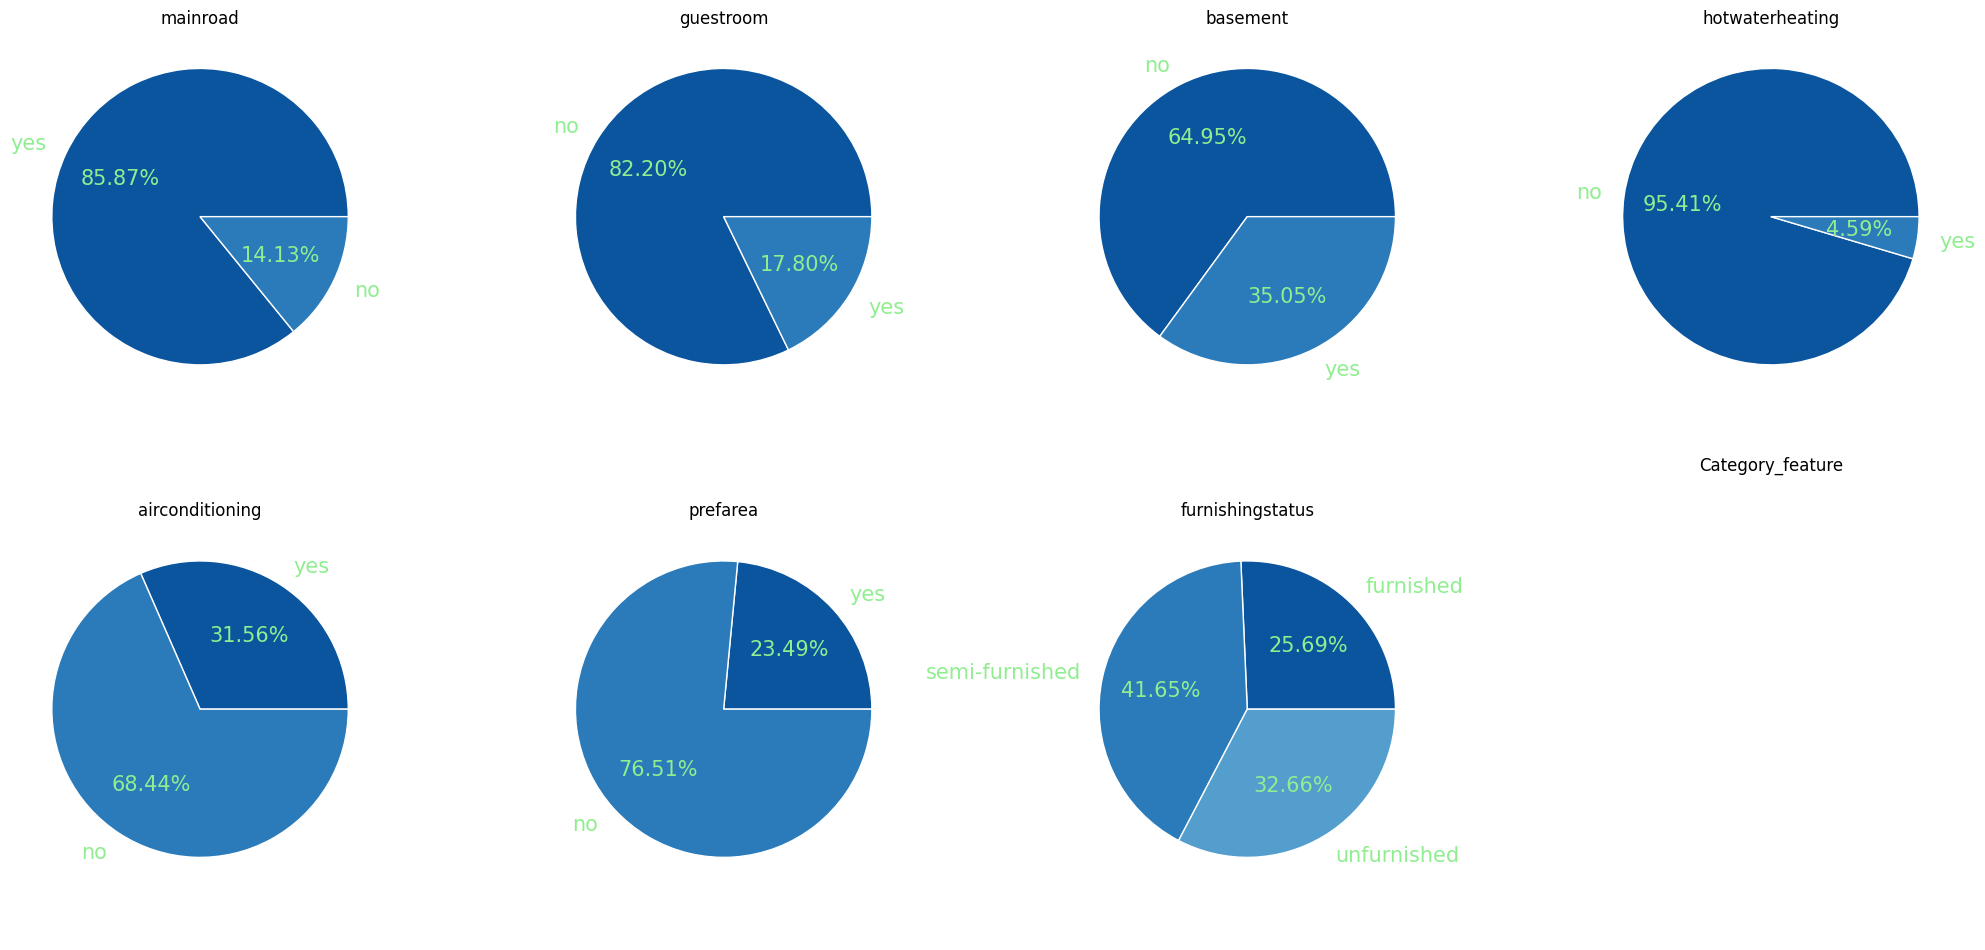

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
plt.title("Category_feature")
for k in range(len(Category_features)):
  num = []
  for t in df[Category_features[k]].unique():
    num.append(df[Category_features[k]].tolist().count(t))
  axes[k//4][k%4].pie(num, labels=df[Category_features[k]].unique(), autopct="%.2f%%", labeldistance=1.15, 
            wedgeprops = {'linewidth':1, 'edgecolor':'white'}, textprops={'color':'lightgreen', 'fontsize':15}, 
            colors=sns.color_palette('Blues_r'))
  axes[k//4][k%4].set_title(Category_features[k])
axes[-1][-1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import random

random_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(5)]

## countplot

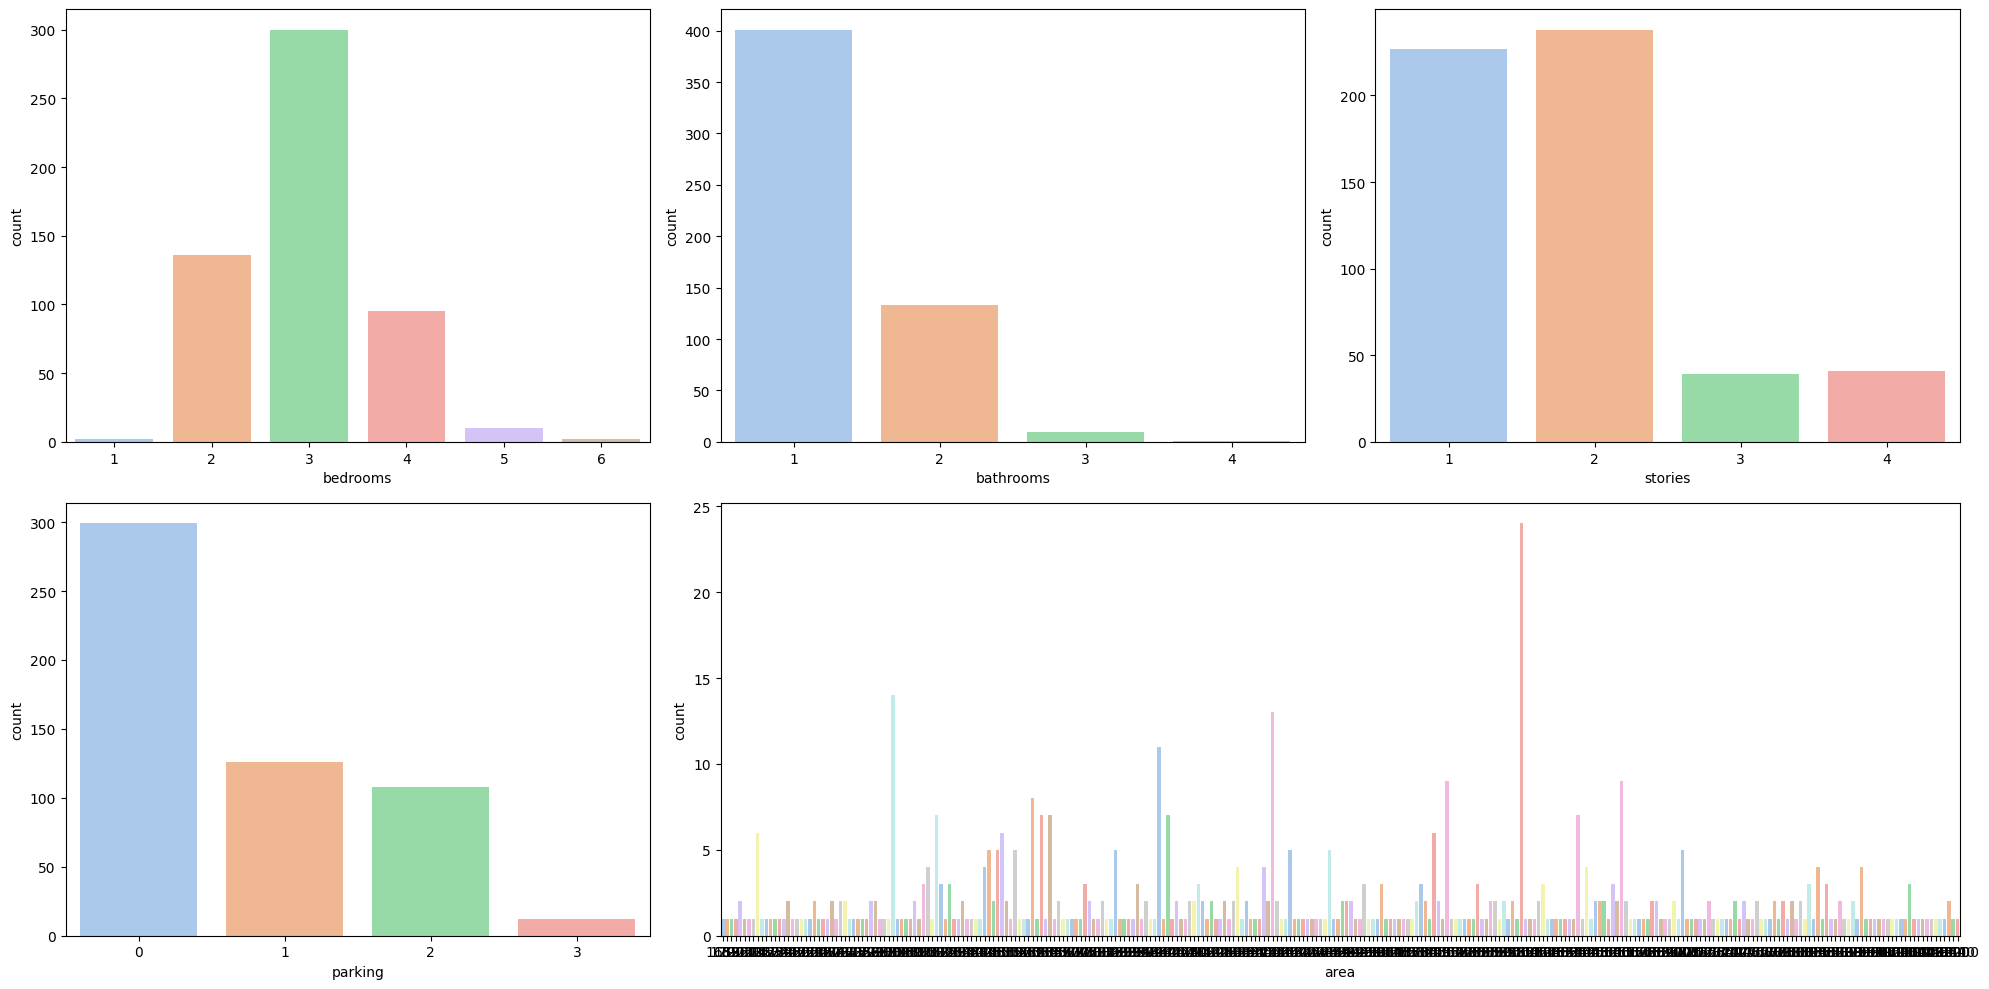

In [ ]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=3)
for k in range(len(Numeric_features)-1):
  ax=fig.add_subplot(gs[k//3, k%3])
  sns.countplot(ax=ax, data=df, x=Numeric_features[k+1], palette=sns.color_palette('pastel'))
k+=1
sns.countplot(ax=fig.add_subplot(gs[k//3, k%3:]), data=df, x=Numeric_features[0], palette=sns.color_palette('pastel'))
plt.tight_layout()
plt.show()

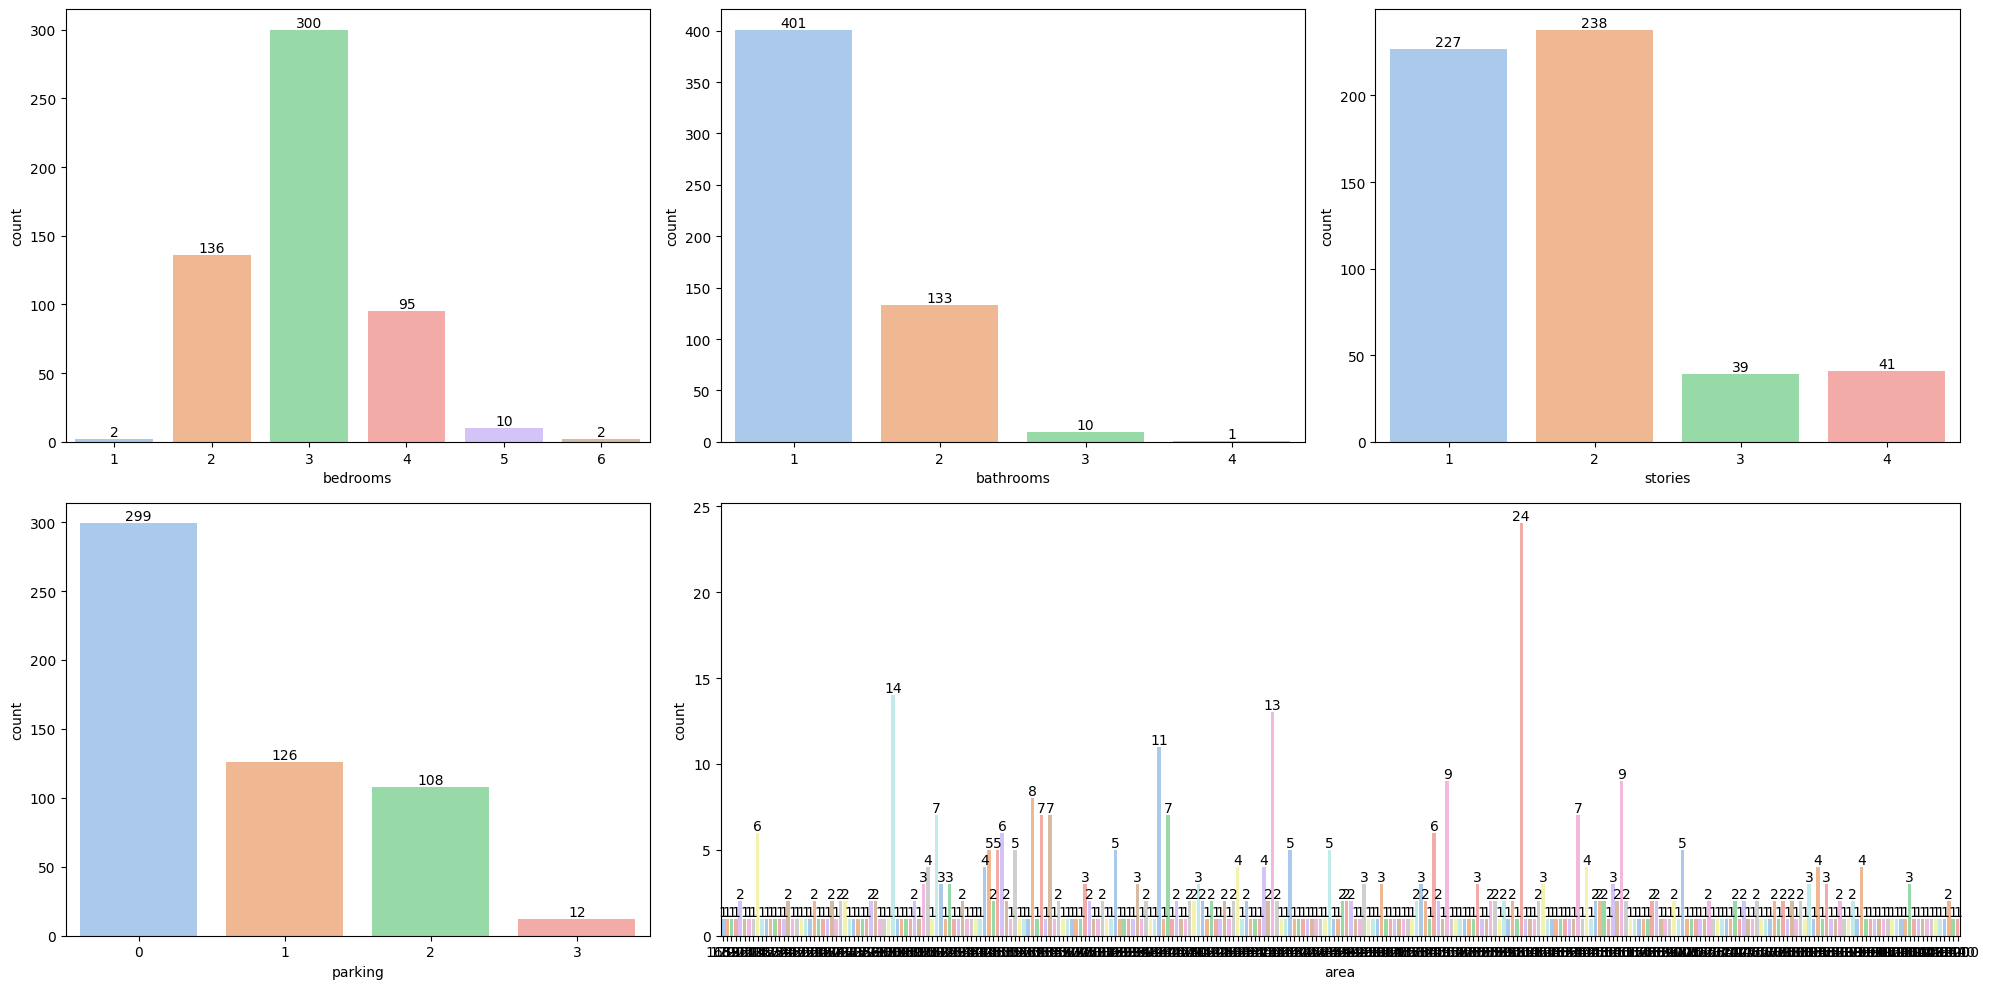

In [ ]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=3)
for k in range(len(Numeric_features)-1):
  ax=fig.add_subplot(gs[k//3, k%3])
  sns.countplot(ax=ax, data=df, x=Numeric_features[k+1], palette=sns.color_palette('pastel'))
  for label in ax.containers:
    ax.bar_label(label)
k+=1
ax = sns.countplot(ax=fig.add_subplot(gs[k//3, k%3:]), data=df, x=Numeric_features[0], palette=sns.color_palette('pastel'))
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()

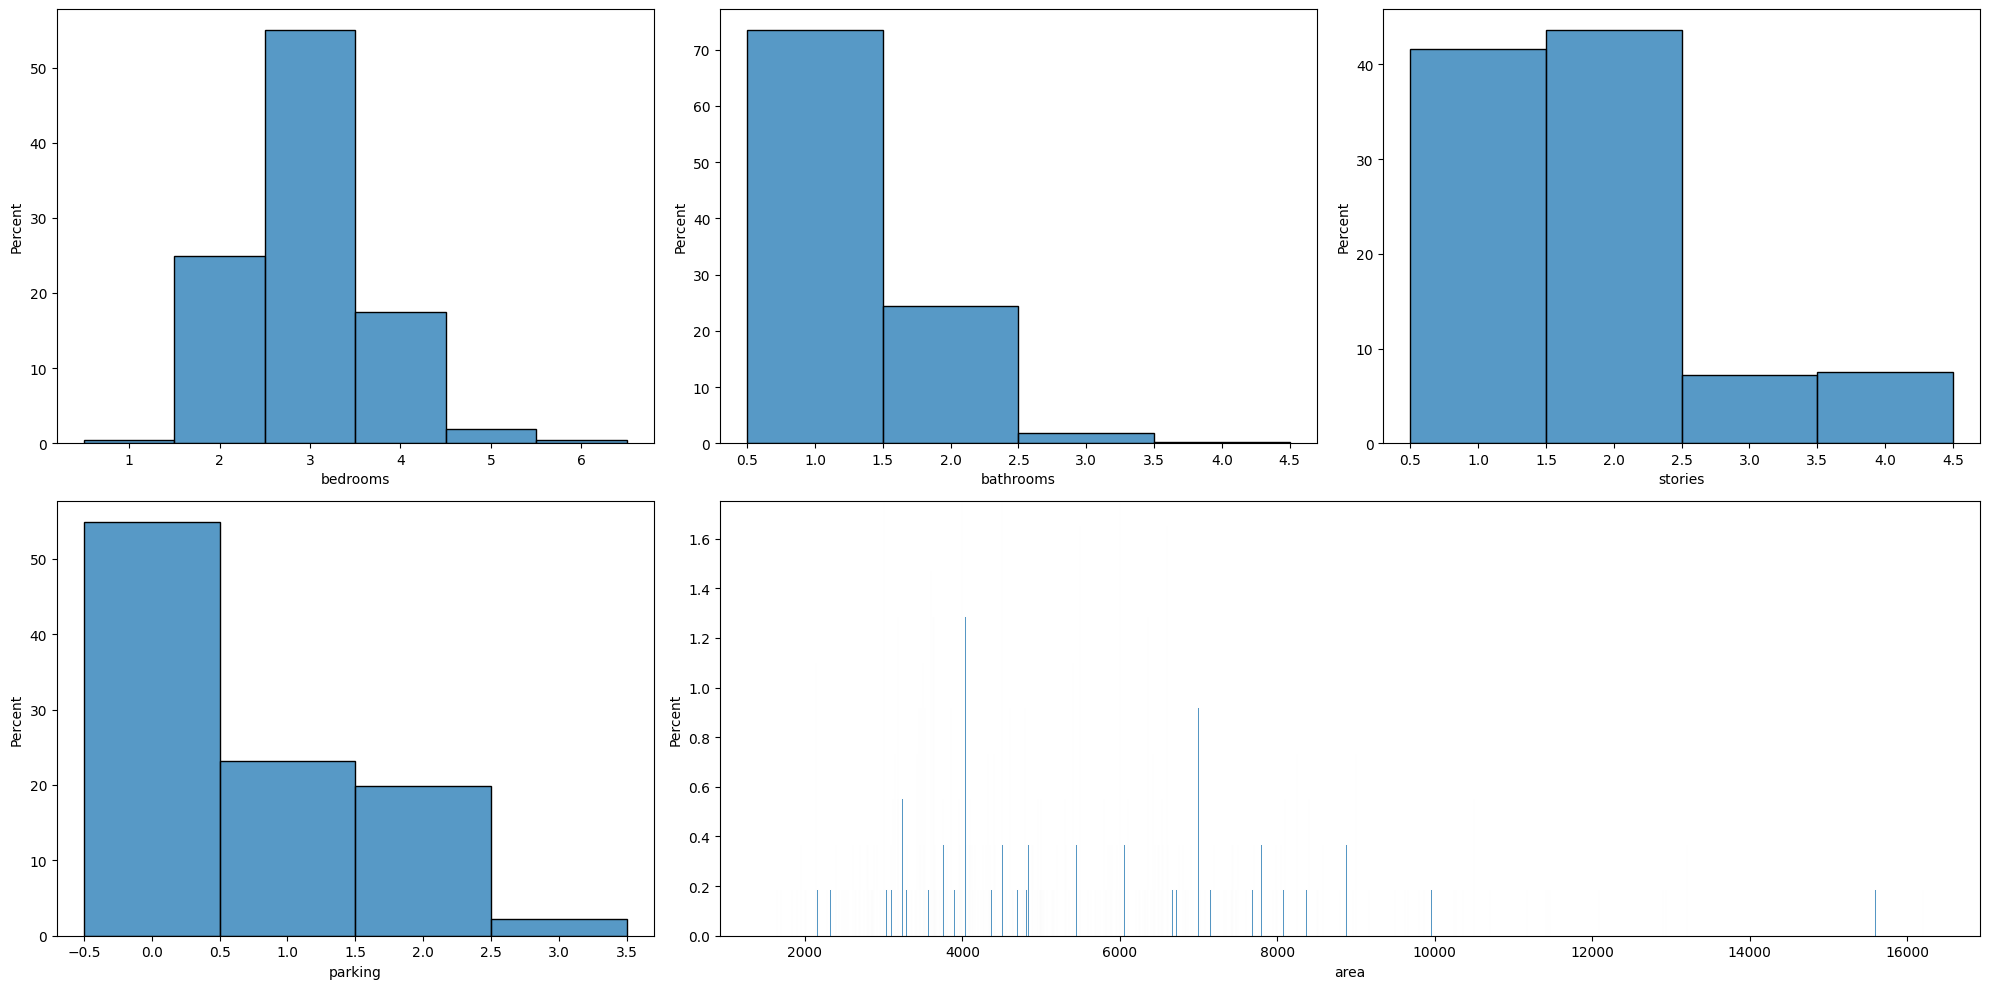

In [ ]:
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(nrows=2, ncols=3)
for k in range(len(Numeric_features)-1):
  ax=fig.add_subplot(gs[k//3, k%3])
  sns.histplot(ax=ax, data=df, x=Numeric_features[k+1], discrete=True, stat="percent")
k+=1
ax0 = fig.add_subplot(gs[k//3, k%3:])
sns.histplot(ax=ax0, data=df, x=Numeric_features[0], discrete=True, stat="percent")
ax0.set_ylim(0,1.75)
plt.tight_layout()
plt.show()

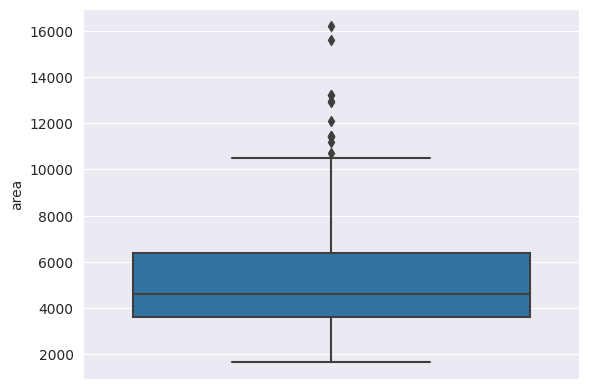

In [ ]:
sns.boxplot(data=df, y="area")
plt.show()

# 觀察結果的分佈

In [ ]:
sns.set_style("darkgrid")

## boxplot

Text(0, 0.5, 'price')

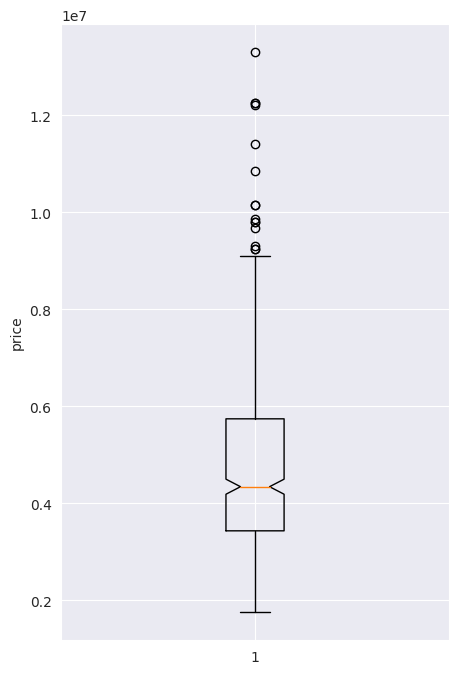

In [ ]:
plt.figure(figsize=(5,8))
plt.boxplot(x=df['price'], notch=True)
plt.ylabel('price')

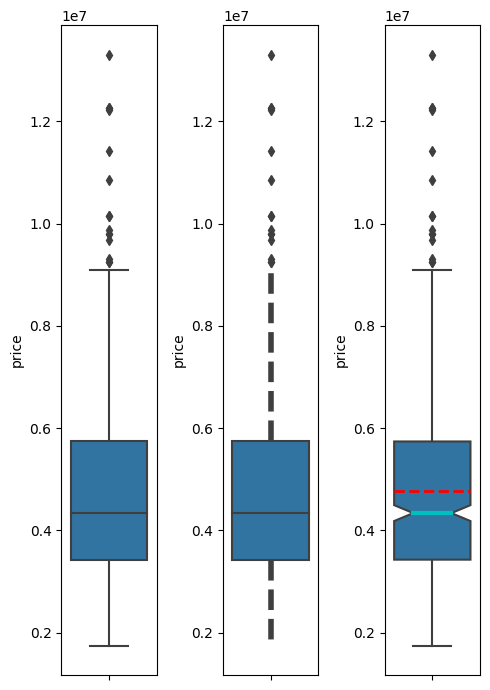

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(5,7))
sns.boxplot(ax=axes[0], data=df, y="price")
sns.boxplot(ax=axes[1], data=df, y="price", showcaps=False, 
        whiskerprops={"linestyle": 'dashed', "lw":4})
sns.boxplot(ax=axes[2], data=df, y="price", notch=True, showmeans=True, meanline=True, 
        meanprops={"color": "r", "lw":2}, medianprops={"color": "c", "lw":3})
plt.tight_layout()
plt.show()

## barplot

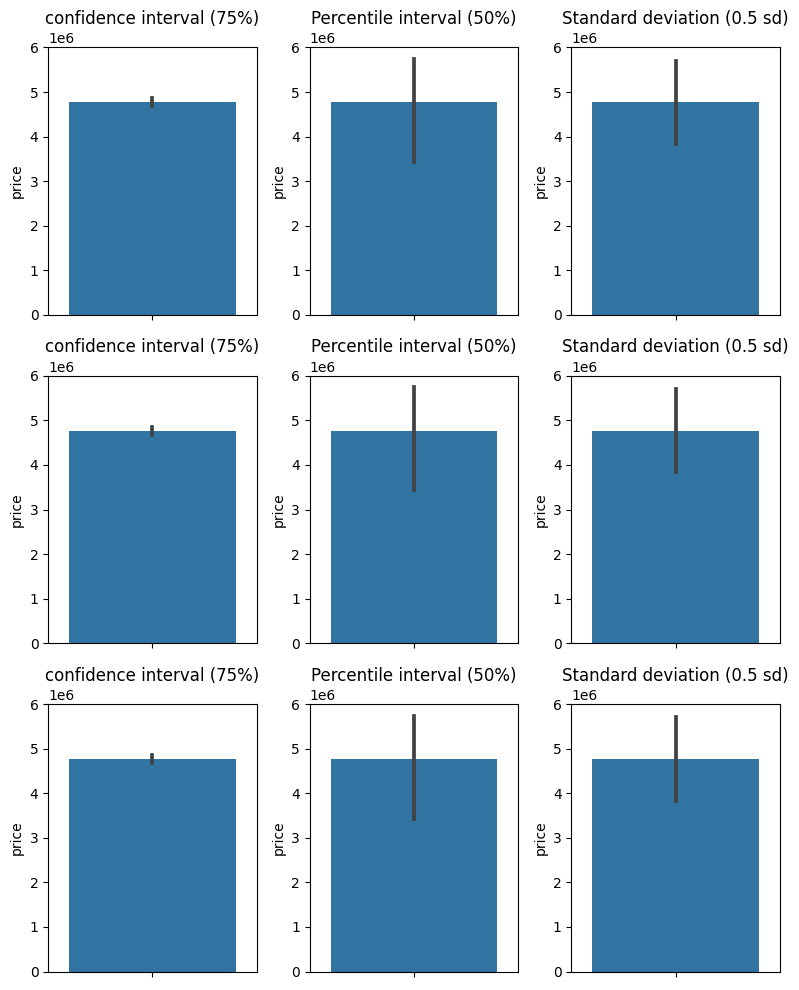

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(8,10))
for i in range(3):
    sns.barplot(ax=axes[i][0], data=df, y='price', errorbar=('ci', 75))
    axes[i][0].set_title("confidence interval (75%)")
    sns.barplot(ax=axes[i][1], data=df, y='price', errorbar=('pi', 50))
    axes[i][1].set_title("Percentile interval (50%)")
    sns.barplot(ax=axes[i][2], data=df, y='price', errorbar=('sd', 0.5))
    axes[i][2].set_title("Standard deviation (0.5 sd)")
    for j in range(3):
        axes[i][j].set_ylim(0,6e6)
plt.tight_layout()
plt.show()

## histplot

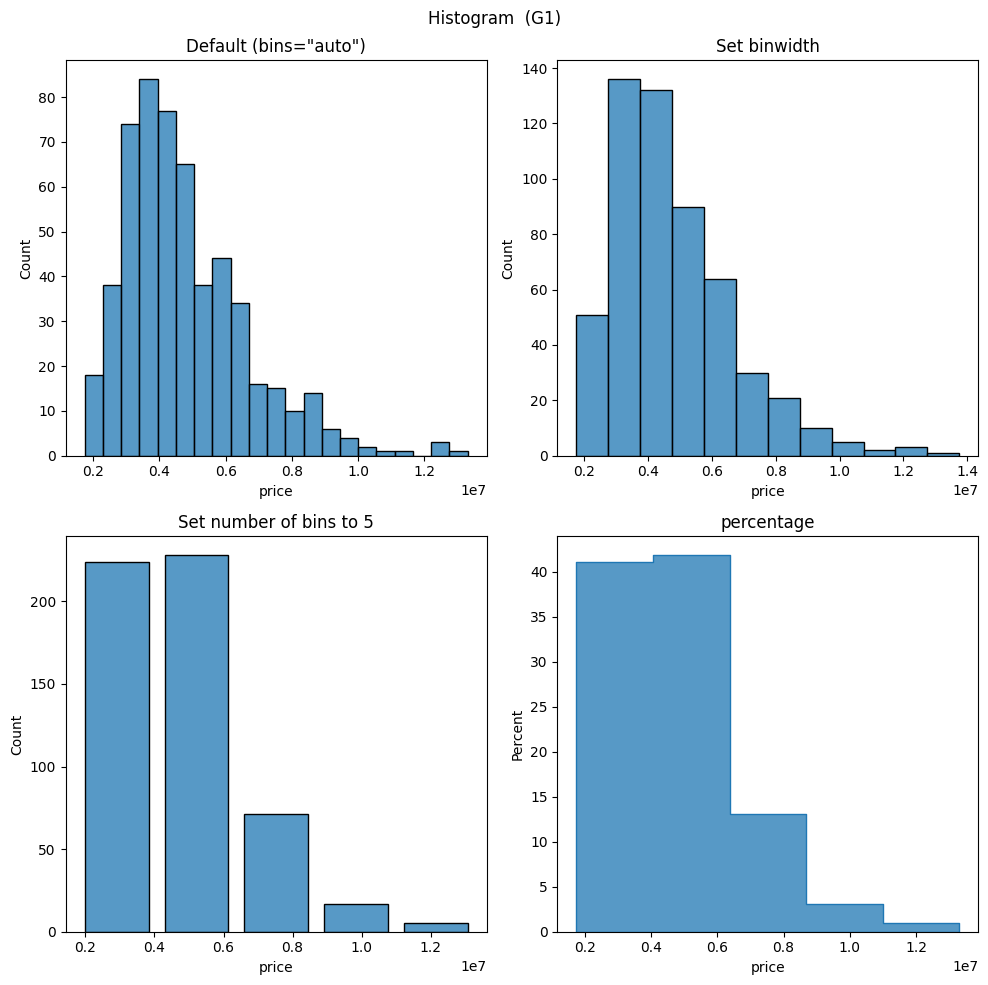

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Histogram')
sns.histplot(ax=axes[0][0], data=df, x='price')
axes[0][0].set_title('Default (bins="auto")')
sns.histplot(ax=axes[0][1], data=df, x='price', binwidth=1e6)
axes[0][1].set_title('Set binwidth to 1e6')
sns.histplot(ax=axes[1][0], data=df, x='price', bins=5, element="bars", shrink=0.8)
axes[1][0].set_title('Set number of bins to 5')
sns.histplot(ax=axes[1][1], data=df, x='price', bins=5, element="step", stat='percent')
axes[1][1].set_title('percentage')
plt.tight_layout()
plt.show()

## kdeplot

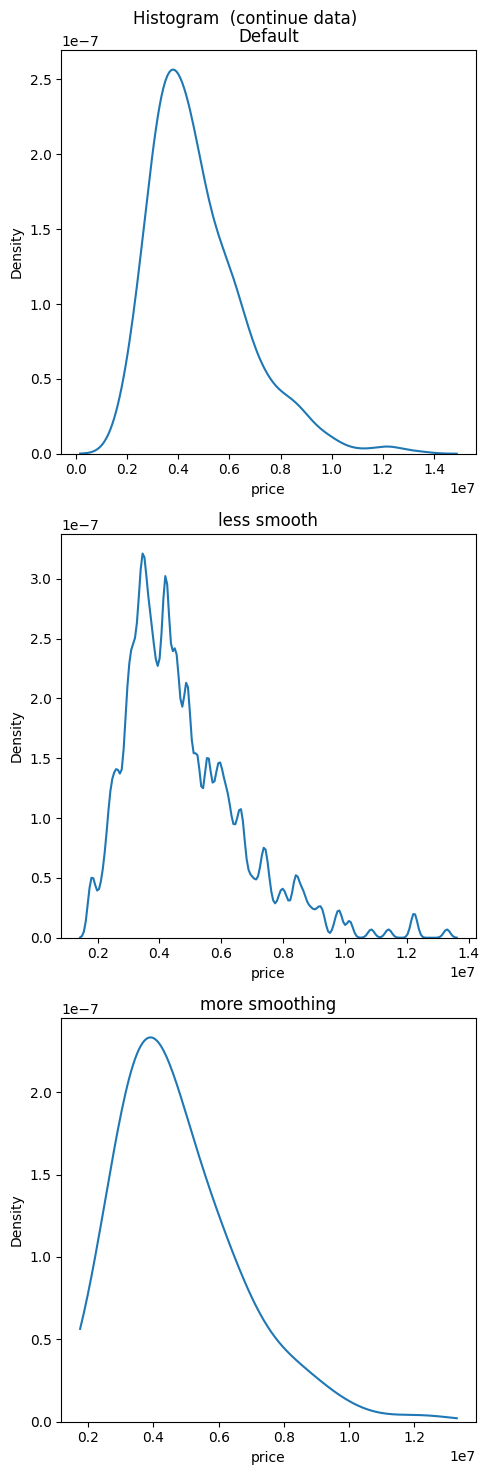

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(5,15))
fig.suptitle('Histogram  (continue data)')
sns.kdeplot(ax=axes[0], data=df, x='price')
axes[0].set_title('Default')
sns.kdeplot(ax=axes[1], data=df, x='price', bw_adjust=.2)
axes[1].set_title('less smooth')
sns.kdeplot(ax=axes[2], data=df, x='price', bw_adjust=1.5, cut=0)
axes[2].set_title('more smoothing')
plt.tight_layout()
plt.show()

## displot

Histogram + Density plot

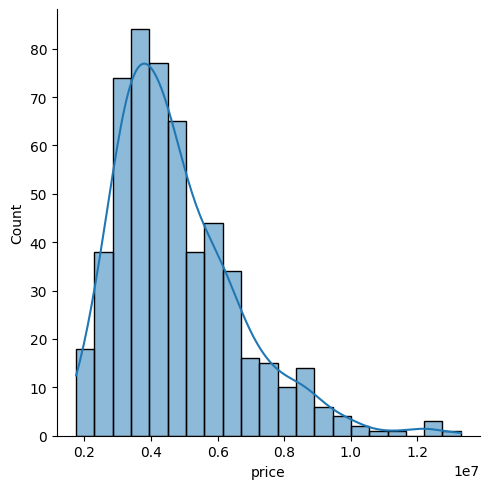

In [ ]:
sns.displot(data=df, x='price', kde=True)

## jointplot

# 觀察特徵與欲預測結果的關係

## Scatter

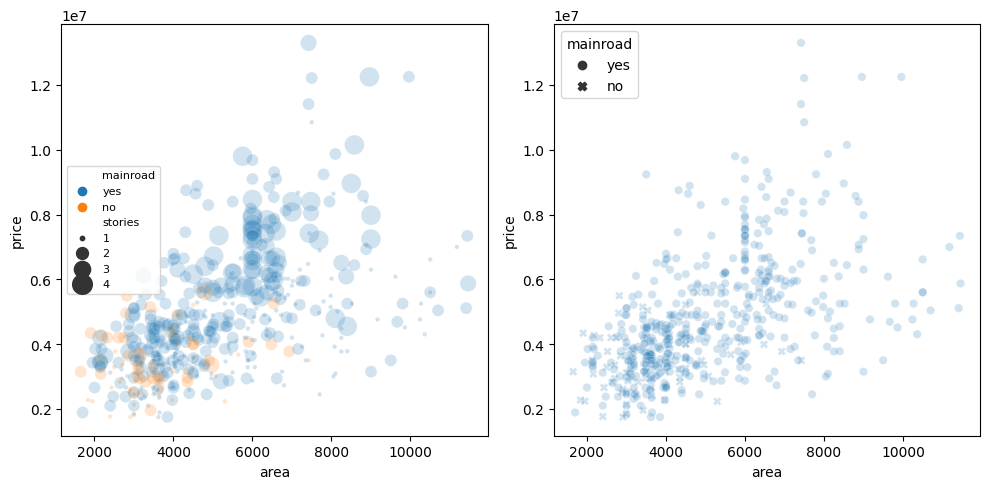

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(ax=axes[0], data=df, x='area', y='price', hue='mainroad', size="stories", sizes=(10, 200), alpha=0.2)
axes[0].legend(loc='center left', prop={'size': 8})
markers = {'no':'X', 'yes':'o'}
sns.scatterplot(ax=axes[1], data=df, x='area', y='price', style='mainroad', markers=markers, alpha=0.2)
plt.tight_layout()
plt.show()

## boxplot

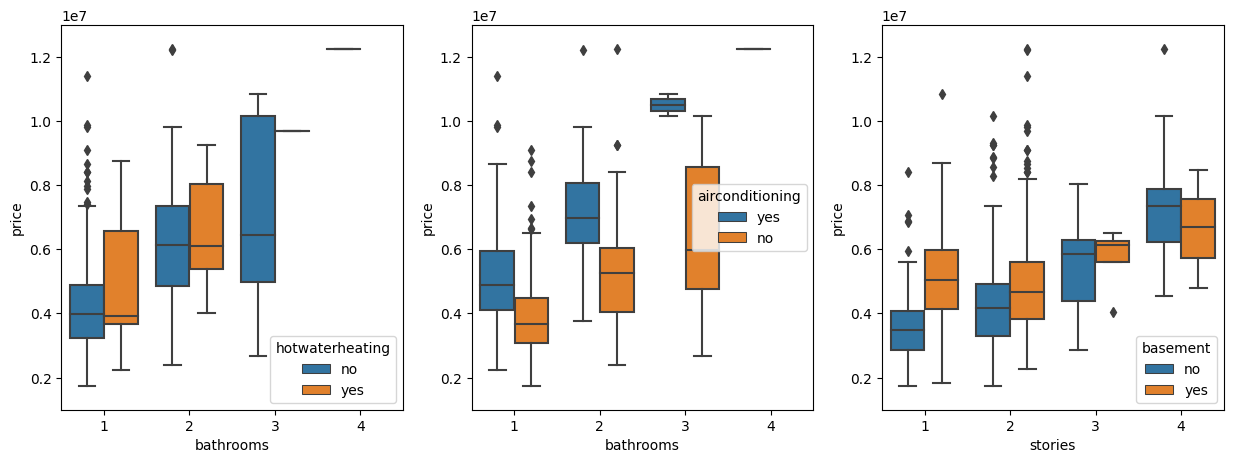

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(ax=axes[0], data=df, x="bathrooms", y="price", hue="hotwaterheating")
sns.boxplot(ax=axes[1], data=df, x="bathrooms", y="price", hue="airconditioning")
sns.boxplot(ax=axes[2], data=df, x="stories", y="price", hue="basement")
for i in range(3):
    axes[i].set_ylim(0.1e7, 1.3e7)
plt.show()

## barplot

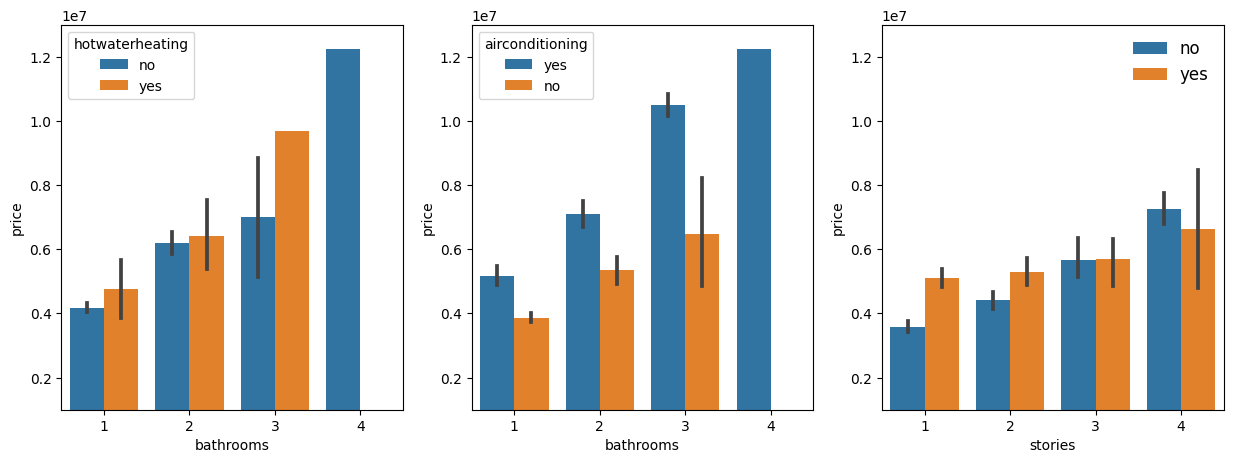

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(ax=axes[0], data=df, x="bathrooms", y="price", hue="hotwaterheating")
sns.barplot(ax=axes[1], data=df, x="bathrooms", y="price", hue="airconditioning")
sns.barplot(ax=axes[2], data=df, x="stories", y="price", hue="basement")
axes[2].legend(loc='upper right', frameon=False, fontsize='large')
for i in range(3):
    axes[i].set_ylim(0.1e7, 1.3e7)
plt.show()

## histplot

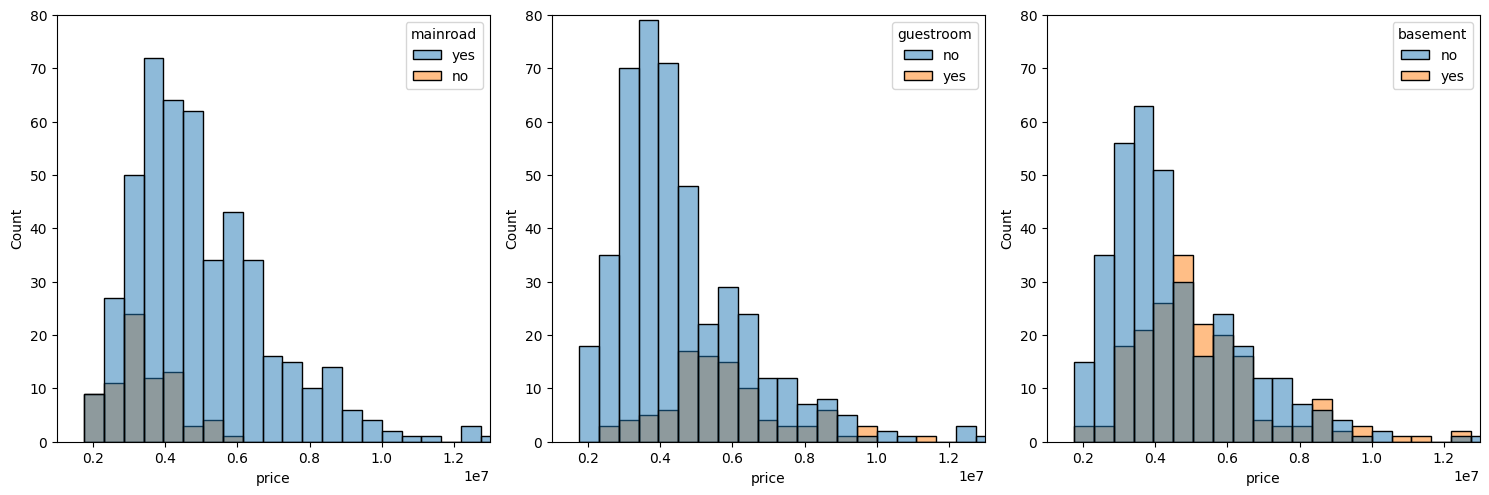

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(ax=axes[0], data=df, x="price", hue="mainroad")
sns.histplot(ax=axes[1], data=df, x="price", hue="guestroom")
sns.histplot(ax=axes[2], data=df, x="price", hue="basement")
plt.tight_layout()
for i in range(3):
    axes[i].set_ylim(0, 80)
    axes[i].set_xlim(0.1e7, 1.3e7)
plt.show()

## kdeplot

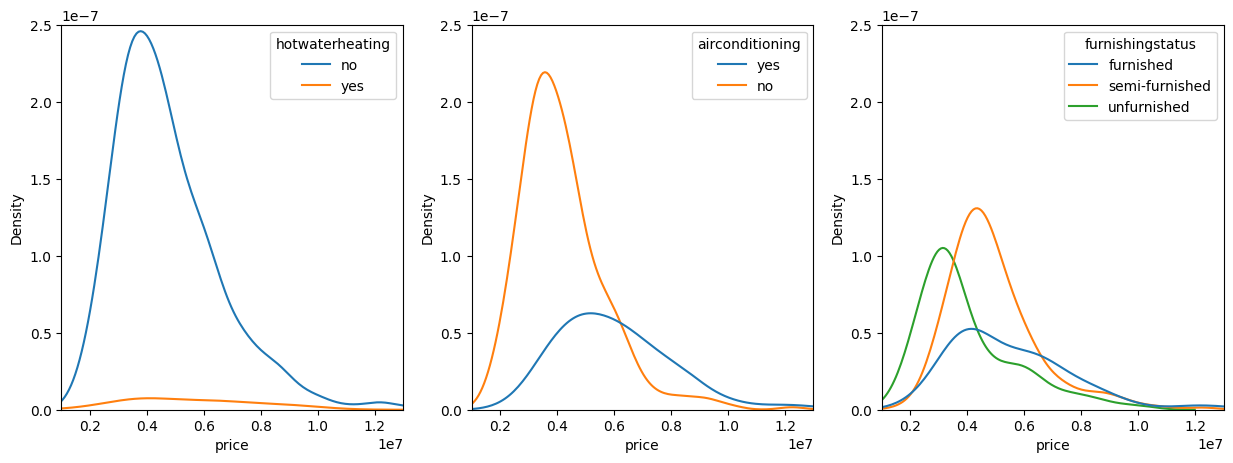

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.kdeplot(ax=axes[0], data=df, x="price", hue="hotwaterheating")
sns.kdeplot(ax=axes[1], data=df, x="price", hue="airconditioning")
sns.kdeplot(ax=axes[2], data=df, x="price", hue="furnishingstatus")
for i in range(3):
    axes[i].set_ylim(0,2.5e-7)
    axes[i].set_xlim(0.1e7, 1.3e7)
plt.show()

## displot

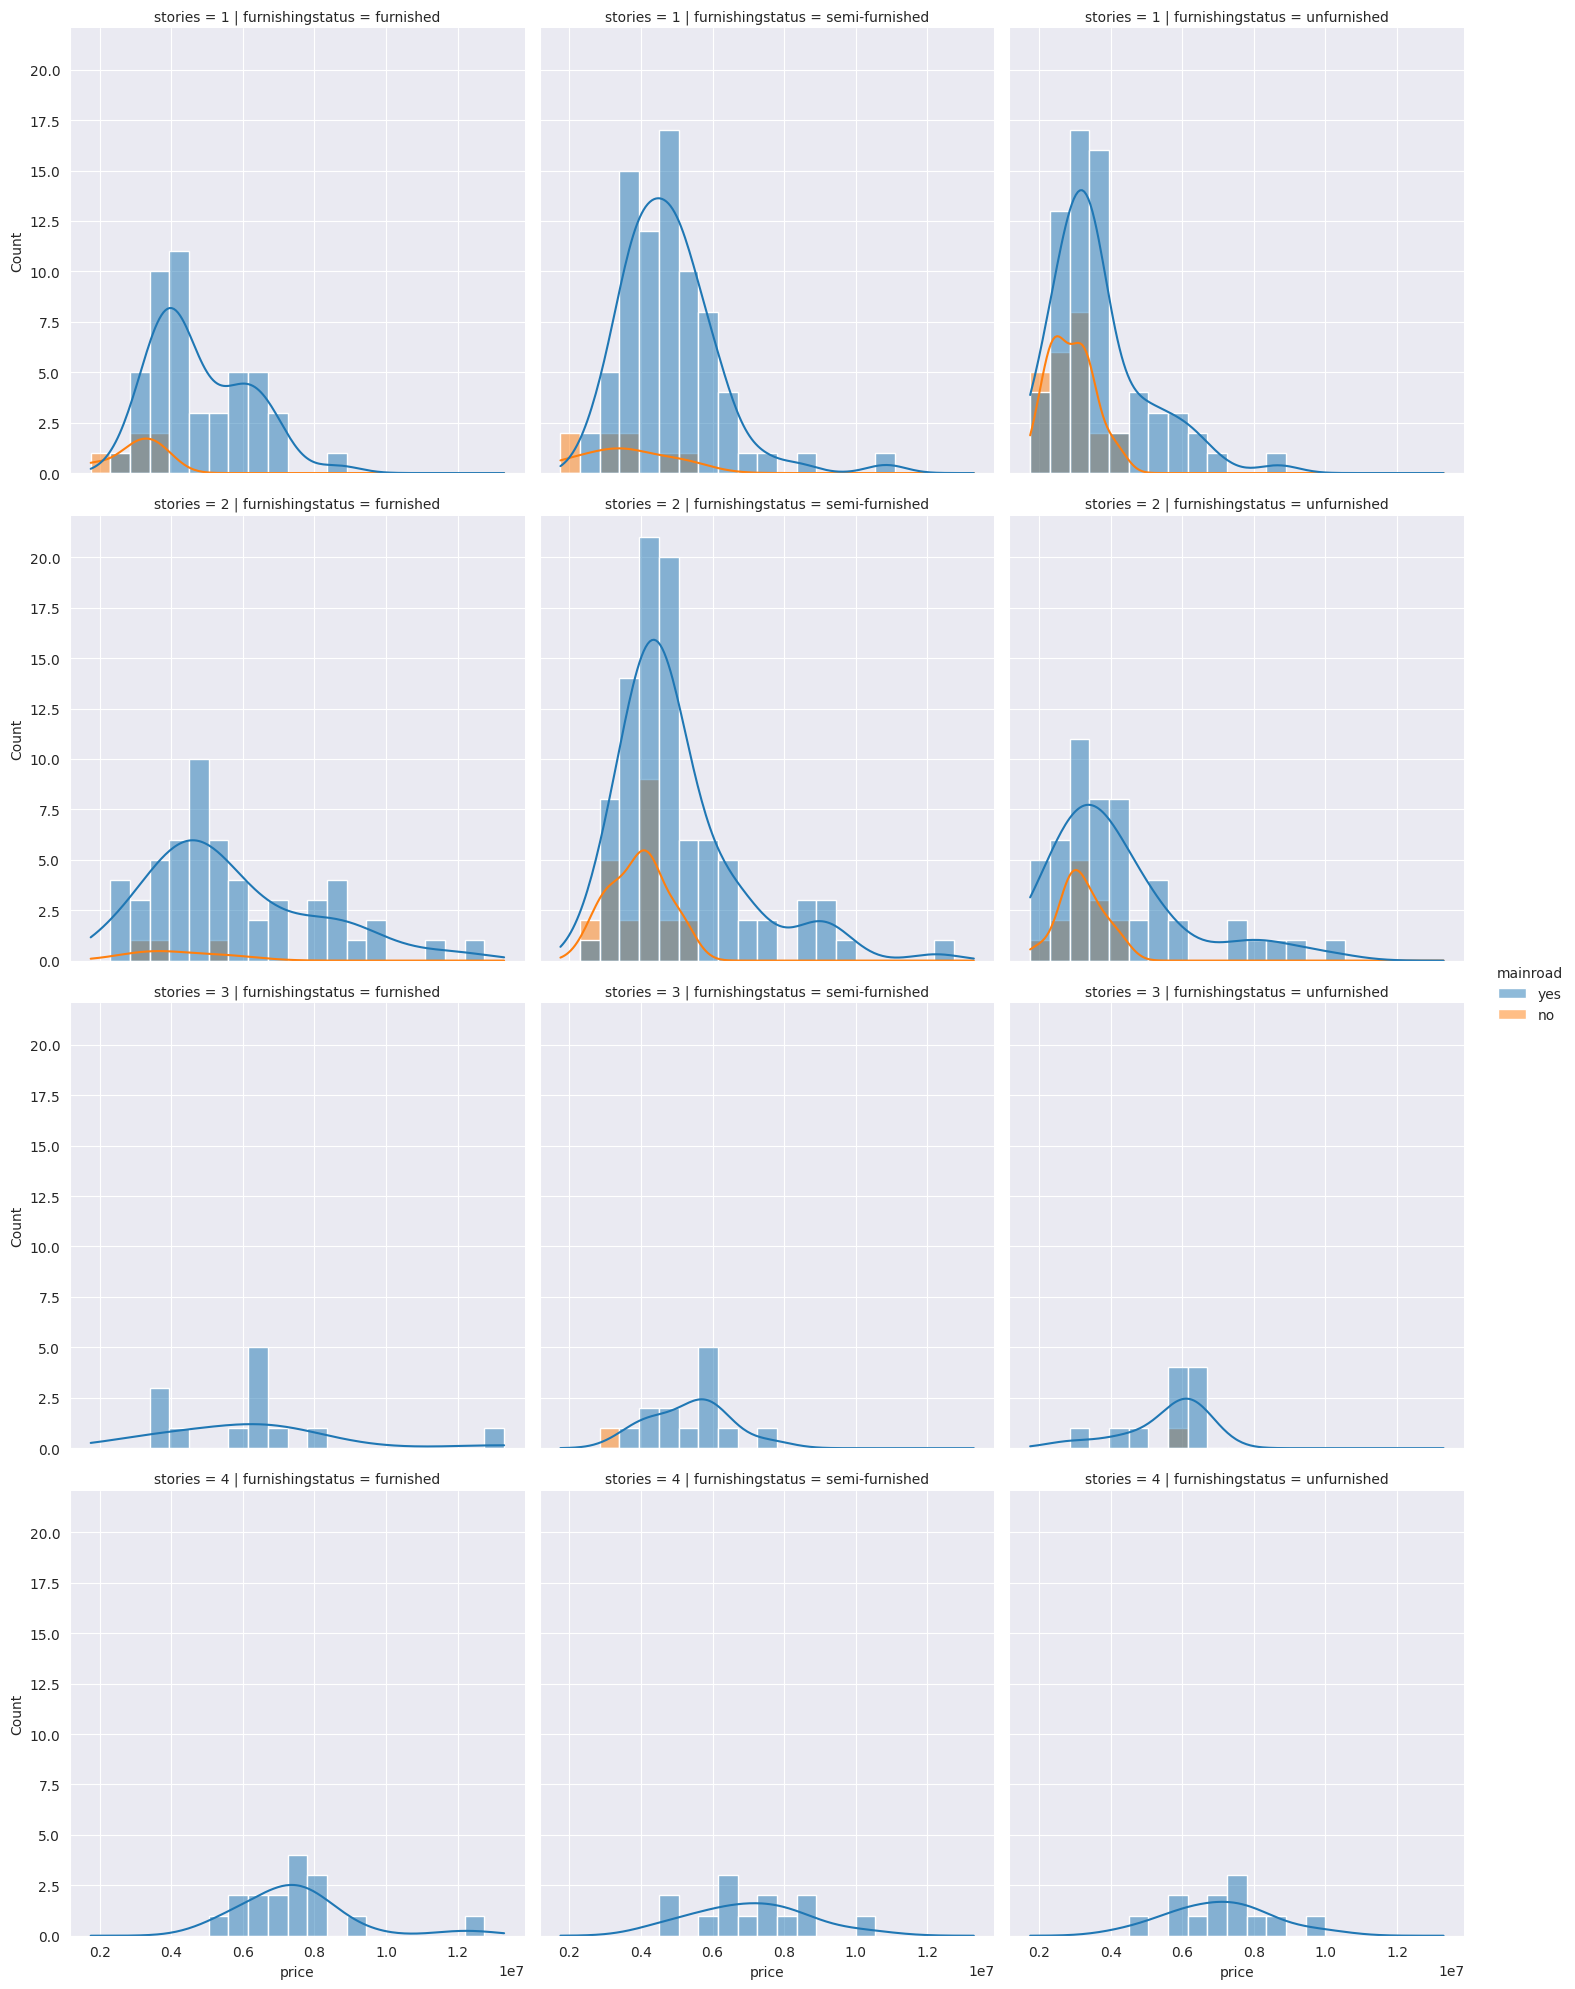

In [ ]:
sns.displot(data=df, x="price", hue="mainroad", row="stories", col="furnishingstatus", kde=True)

## catplot

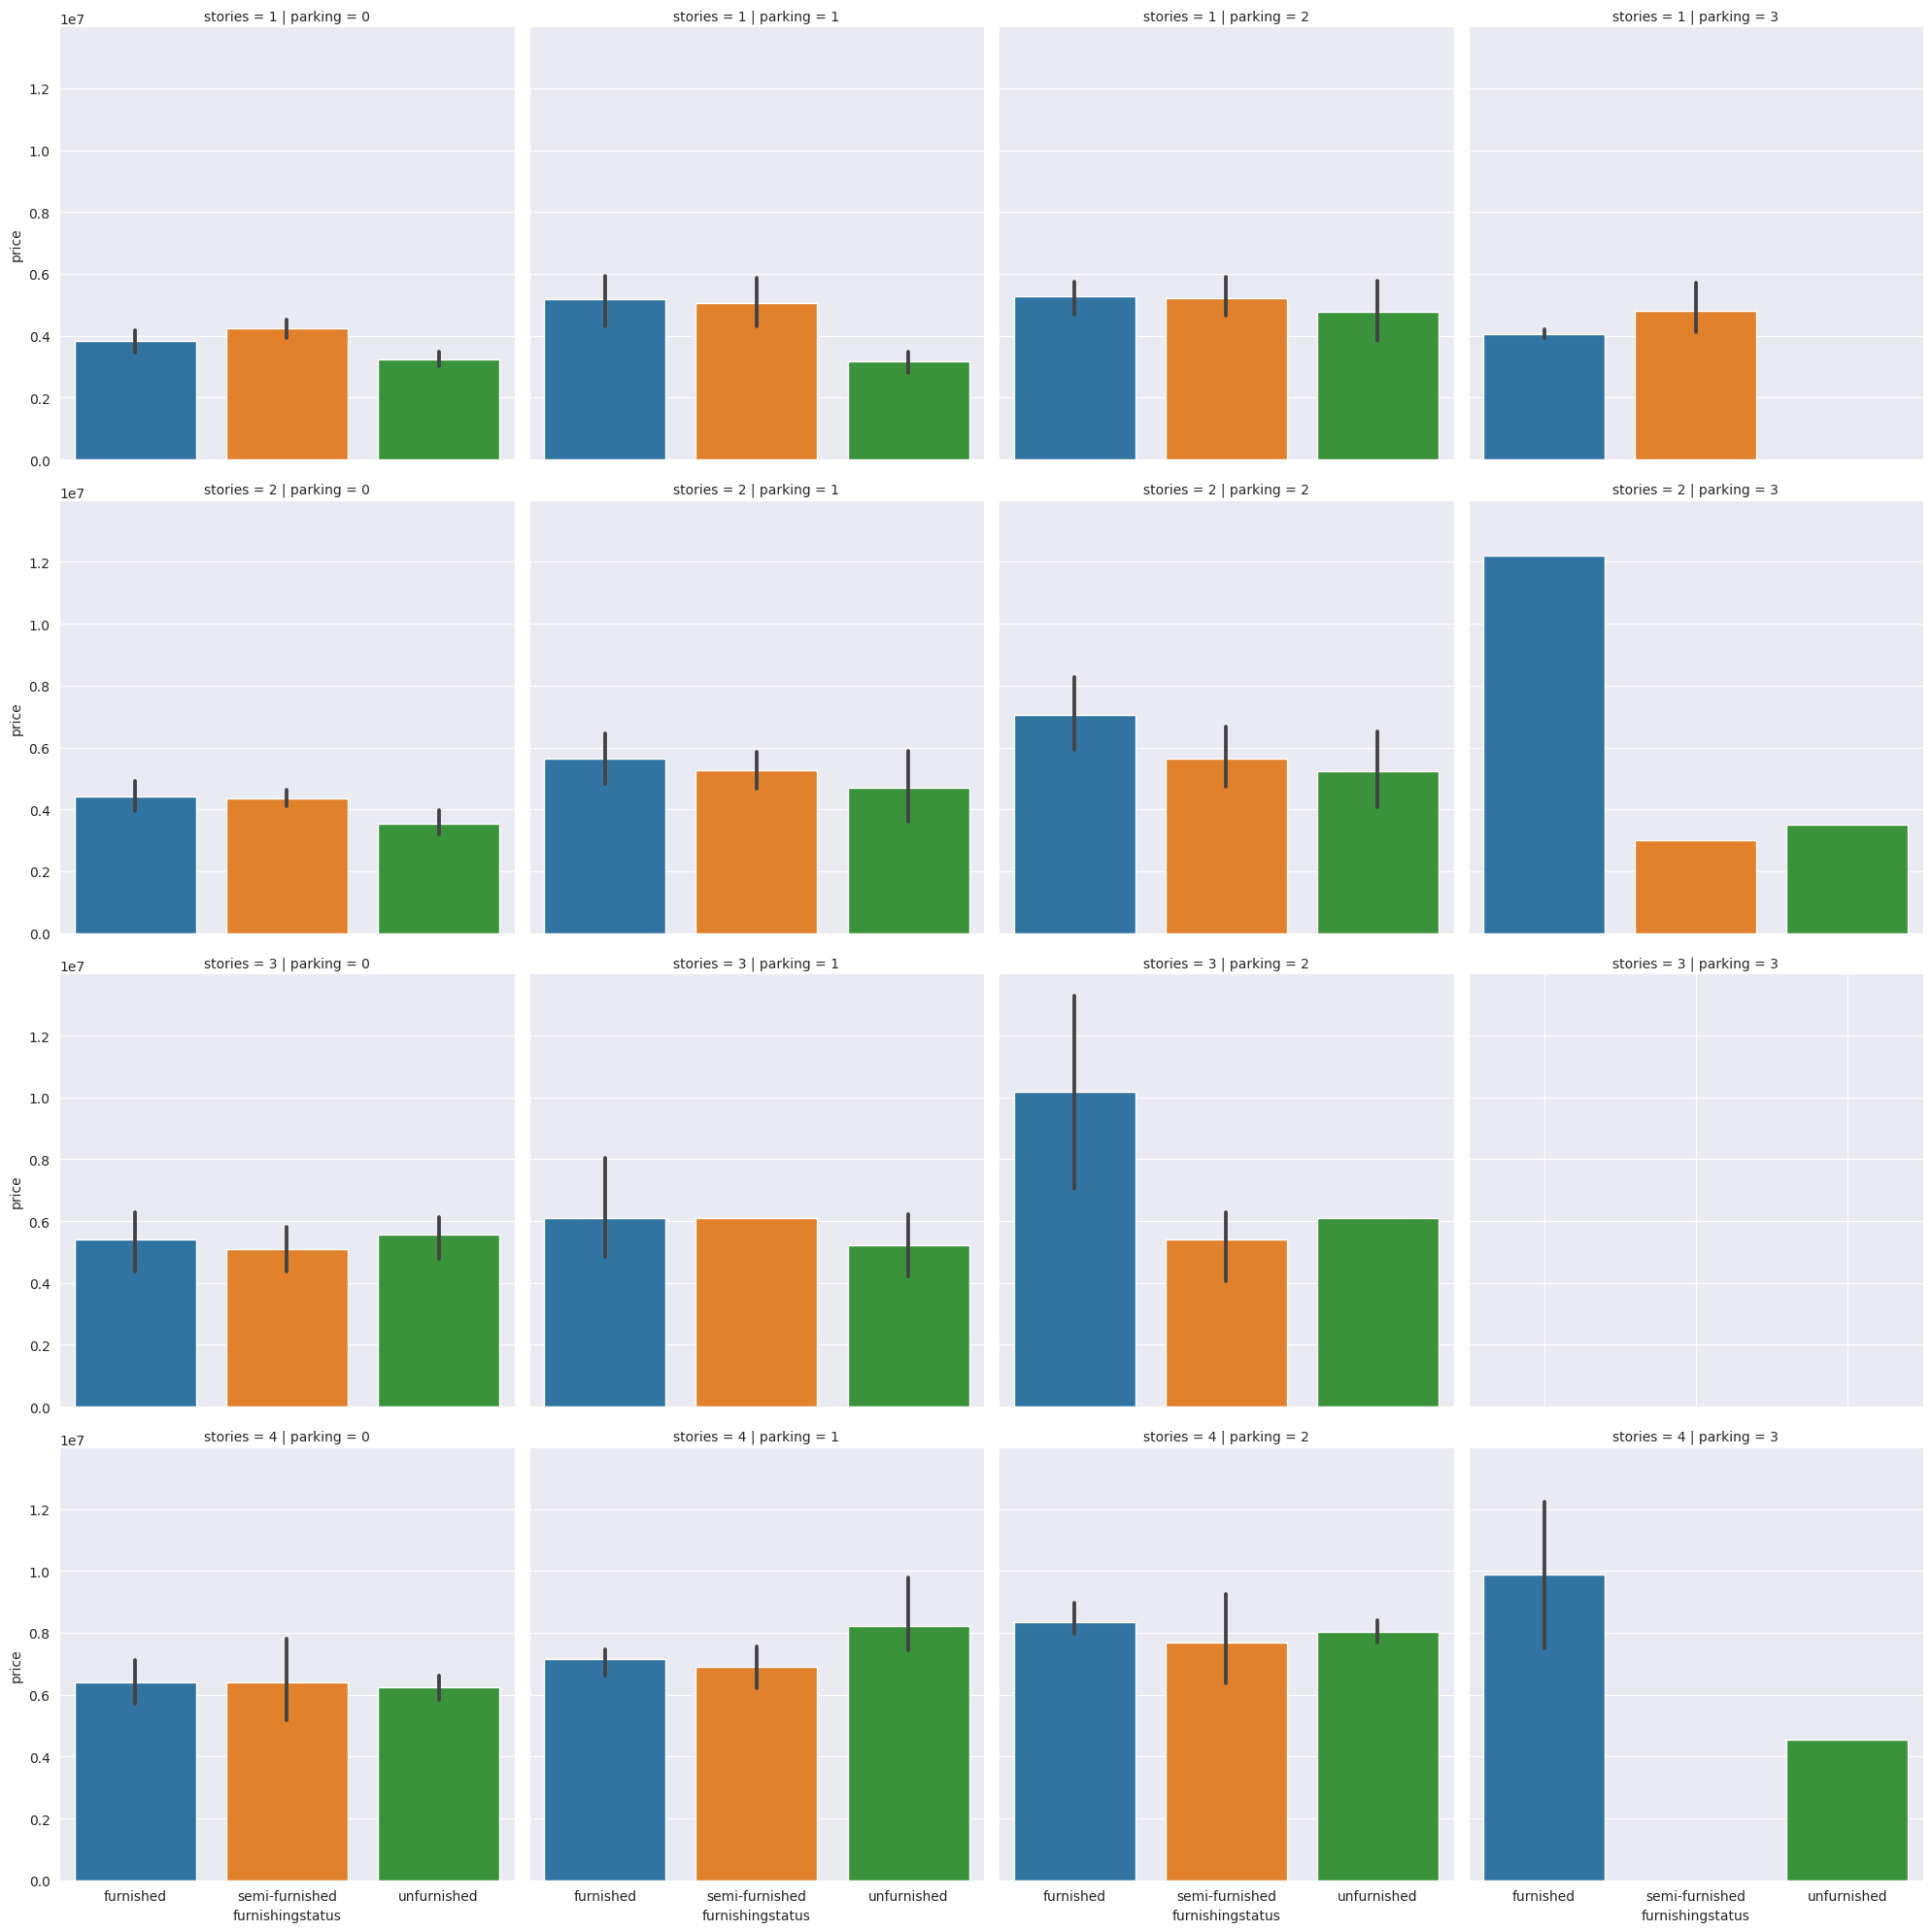

In [ ]:
sns.catplot(data=df, x="furnishingstatus", y="price", 
      row="stories", col="parking", kind="bar")
plt.show()

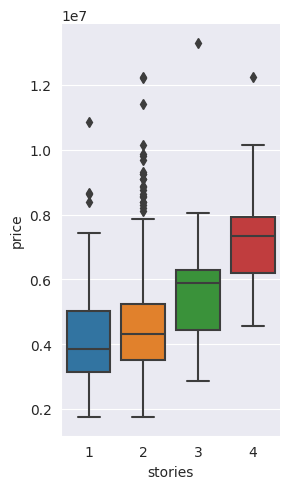

In [ ]:
sns.catplot(data=df, x="stories", y="price", kind="box", aspect=0.6)
plt.show()

## jointplot

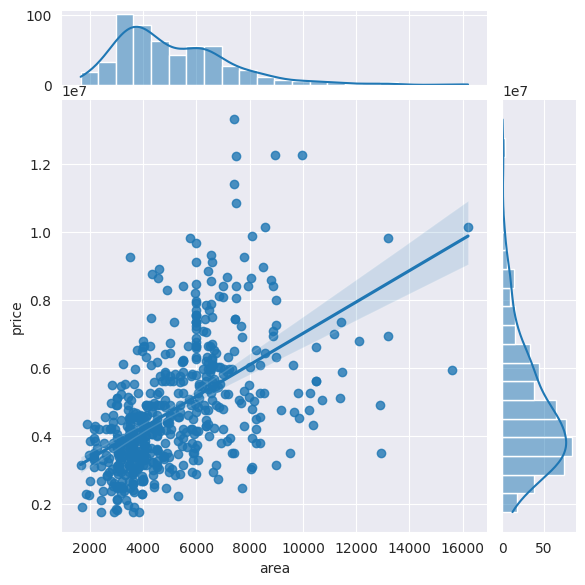

In [ ]:
sns.jointplot(data=df, x="area", y="price", kind="reg", marginal_ticks=True)

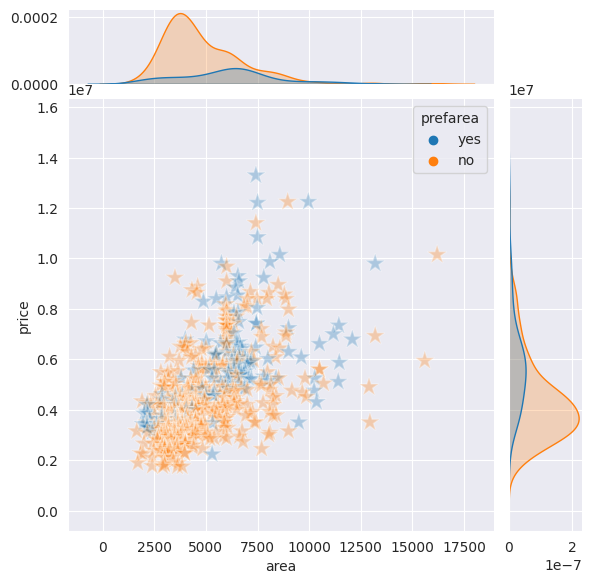

In [ ]:
sns.jointplot(data=df, x="area", y="price", hue="prefarea", marker="*", s=200, alpha=0.3, marginal_ticks=True)

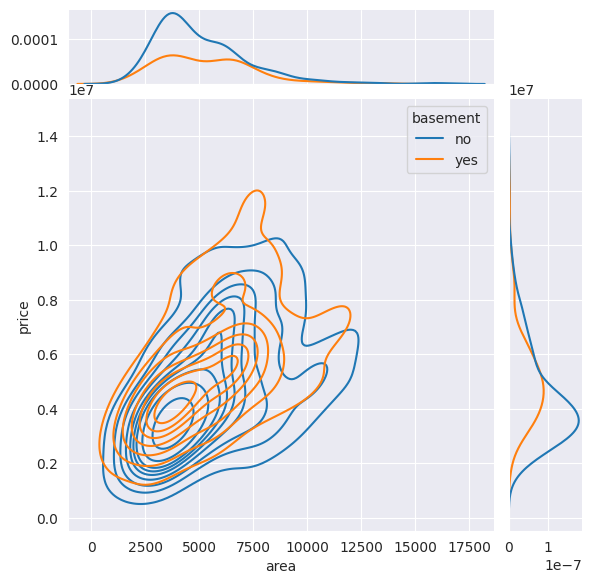

In [ ]:
sns.jointplot(data=df, x="area", y="price", kind="kde", hue="basement", marginal_ticks=True)

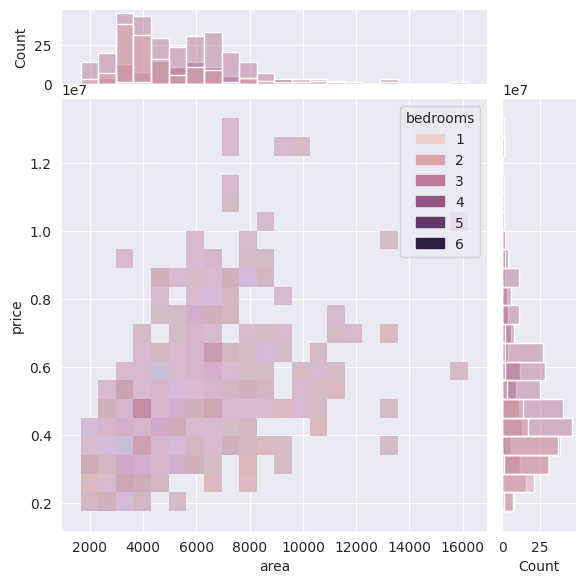

In [ ]:
sns.jointplot(data=df, x="area", y="price", kind="hist", hue="bedrooms", marginal_ticks=True)

## Heatmap

heatmap based on pairwise correlation of columns

In [ ]:
print(df.cov())

                  price          area       bedrooms      bathrooms  \
price      3.498544e+12  2.175676e+09  505946.425931  486409.333378   
area       2.175676e+09  4.709512e+06     243.232140     211.346617   
bedrooms   5.059464e+05  2.432321e+02       0.544738       0.138674   
bathrooms  4.864093e+05  2.113466e+02       0.138674       0.252476   
stories    6.826446e+05  1.581294e+02       0.261589       0.142171   
parking    6.194673e+05  6.599897e+02       0.088562       0.076842   

                 stories        parking  
price      682644.632825  619467.324204  
area          158.129368     659.989696  
bedrooms        0.261589       0.088562  
bathrooms       0.142171       0.076842  
stories         0.752543       0.034043  
parking         0.034043       0.742330  


<ipython-input-67-0a12e4c3650a>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.cov())


<ipython-input-4-4dad601da116>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues", annot=True)


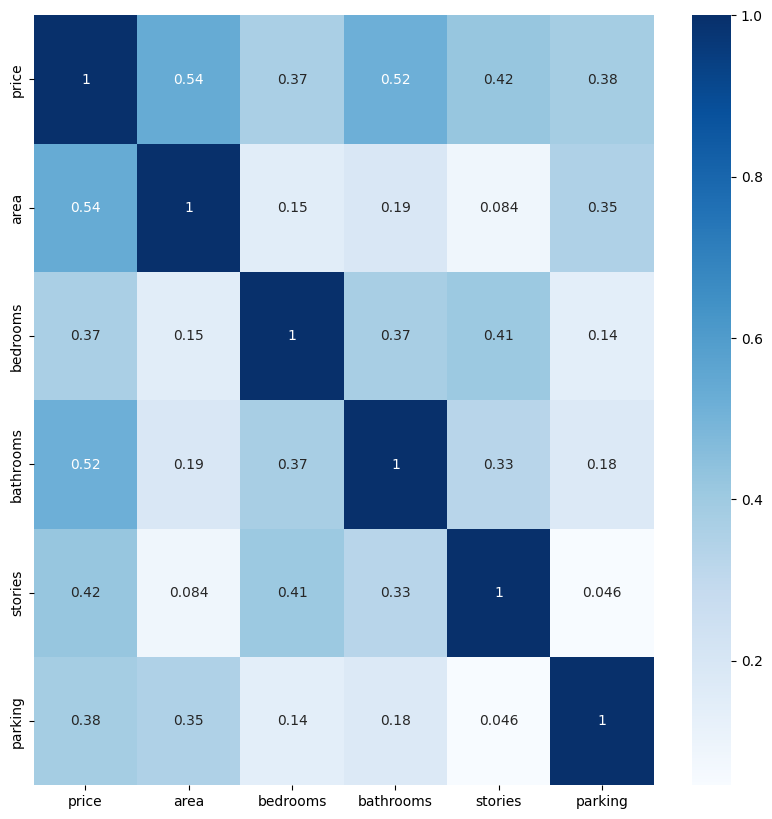

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

# Outlier Detection

## Using the Interquartile Range (IQR)

In [ ]:
Q1, Q3 = df['area'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR 

In [ ]:
print(df.shape)
df = df[ (df['area'] >= lower_limit) & (df['area'] <= upper_limit) ]
print(df.shape)

(545, 13)
(533, 13)


## Using Z-Score

In [ ]:
print(df.shape)
r = 3
z_score = (df['area'] - df['area'].mean())/df['area'].std()
df = df[ (z_score > (-1)*r) & (z_score < r) ]
print(df.shape)

(534, 13)
(533, 13)


## Using Standard Deviation

In [193]:
r = 3
lower_limit = df['area'].mean() - r*df['area'].std()
upper_limit = df['area'].mean() + r*df['area'].std()  

In [194]:
print(df.shape)
df = df[ (df['area'] >= lower_limit) & (df['area'] <= upper_limit) ]
print(df.shape)

(545, 13)
(538, 13)


# Handling Missing Values

In Pandas, usually, missing values are represented by NaN. It stands for Not a Number.


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Delete

In [ ]:
df = df.dropna(axis=0)

# If a certain column has many missing values, then you can choose to drop the entire column.
# df = train_df.drop(['feature_name'],axis=1)

## Replacing with an arbitrary value

In [ ]:
# import numpy as np

# df = pd.DataFrame({
#     'feature_name' : ['square', np.nan, 'oval', 'square', 'circle', np.nan, 'triangle'],
#     'feature_name2' : [1, np.nan, 3, 4, 5, np.nan, 7],
#     'feature_name3' : ['squares', 'triangles', np.nan, 'circles', 'ovals', np.nan, 'squares'],
# })
# df

,feature_name,feature_name2,feature_name3
0,square,1.0,squares
1,NaN,NaN,triangles
2,oval,3.0,NaN
3,square,4.0,circles
4,circle,5.0,ovals
5,NaN,NaN,NaN
6,triangle,7.0,squares


In [ ]:
# replacing the missing values of the 'feature_name' column with ‘0’
# df['feature_name'] = df['feature_name'].fillna(0)  

# it's NOt useful for categorical feature
# replacing the missing values of the 'feature_name' column with the mean of the respective column values.
# df['feature_name2'] = df['feature_name2'].fillna(df['feature_name2'].mean())  

# replacing the missing values of the 'feature_name' column with the mode
# df['feature_name'] = df['feature_name'].fillna(df['feature_name'].mode()[0]) 

# # it's NOT useful for categorical feature
# replacing the missing values of the 'feature_name' column with the median
# df['feature_name2'] = df['feature_name2'].fillna(df['feature_name2'].median())  

# forward fill : propagate last valid observation forward to next valid.
# df['feature_name'] = df['feature_name'].ffill()
# df['feature_name'] = df['feature_name'].fillna(method='ffill')  

# df['feature_name'] = df['feature_name'].bfill()
# df['feature_name'] = df['feature_name'].fillna(method='bfill') 
 
# it's NOT useful for categorical feature
# df['feature_name2'] = df['feature_name2'].interpolate()  

# df

In [ ]:
# from sklearn.impute import SimpleImputer

# # missing_valuesint : float, str, np.nan, None or pandas.NA, default=np.nan
# # strategy : str, default=’mean’
# imr = SimpleImputer(strategy='most_frequent')  # “mean”、“median”、“most_frequent”、“constant”
# df = pd.DataFrame( imr.fit_transform(df), columns = df.columns)
# # imr = imr.fit(df)
# # df = imr.transform(df)

# df

# Encoding

categorical feature v.s. numerical feature

In [ ]:
df[Category_features].head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


## Ordinal Encoding

In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df['furnishingstatus'].head(8)

0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
5    semi-furnished
6    semi-furnished
7       unfurnished
Name: furnishingstatus, dtype: object

In [ ]:
type_dict = {'unfurnished':1, 'semi-furnished': 2, 'furnished': 3}
df['furnishingstatus'] = df['furnishingstatus'].map(type_dict)

df['furnishingstatus'].head(8)

0    3
1    3
2    2
3    3
4    3
5    2
6    2
7    1
Name: furnishingstatus, dtype: int64

## Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in Category_features:
    df[i] = le.fit_transform(df[i])
df[Category_features].head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0


## One-Hot Encoding

In [ ]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df = pd.get_dummies(df, prefix_sep="_", columns=Category_features)
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [ ]:
a = ['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
df[a].head(5)

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


## Frequency Encoding

In [195]:
for feature in Category_features:
  print(df[feature].value_counts())

yes    461
no      77
Name: mainroad, dtype: int64
no     441
yes     97
Name: guestroom, dtype: int64
no     349
yes    189
Name: basement, dtype: int64
no     514
yes     24
Name: hotwaterheating, dtype: int64
no     368
yes    170
Name: airconditioning, dtype: int64
no     412
yes    126
Name: prefarea, dtype: int64
semi-furnished    226
unfurnished       176
furnished         136
Name: furnishingstatus, dtype: int64


In [196]:
df[Category_features].head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [197]:
for k in Category_features:
  num = df[k].value_counts()  
  for i in range(len(num.index)):
    df[k] = df[k].replace(num.index[i], num[num.index[i]])

df[Category_features].head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,461,441,349,514,170,126,136
1,461,441,349,514,170,412,136
2,461,441,189,514,368,126,226
3,461,441,189,514,170,126,136
4,461,97,189,514,170,412,136


# Split Data

In [198]:
X = df.drop("price", axis=1)
Y = df["price"]

print(X.shape, Y.shape)

(538, 12) (538,)


In [199]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_label, test_label = train_test_split(X, Y, random_state=777, train_size=0.8)

print(train_feature.shape, test_feature.shape, train_label.shape, test_label.shape)

(430, 12) (108, 12) (430,) (108,)


# Models

In [200]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

Models=[
    ["Linear Regression", LinearRegression()],
    ["Decision Tree Regressor", DecisionTreeRegressor()],
    ["RandomForestRegressor", RandomForestRegressor()],
    ["Gradient Boosting Regressor", GradientBoostingRegressor()],
]

# Train


In [201]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pred_result = pd.DataFrame(test_label)
column_name = ['model name', 'MAE', 'MSE', 'R Square']
performance = pd.DataFrame([], columns=column_name)

i=0
for name, model in Models:
    Regressor = model
    Regressor.fit(train_feature, train_label)
    pred = Regressor.predict(test_feature)
    pred_result[name+"_predict"] = pred
    perf = []
    perf.append(name)
    perf.append(mean_absolute_error(test_label, pred))
    perf.append(mean_squared_error(test_label, pred))
    perf.append(r2_score(test_label, pred))
    performance.loc[i] = perf
    i+=1


performance
  

,model name,MAE,MSE,R Square
0,Linear Regression,7.705161e+05,1.107675e+12,0.731352
1,Decision Tree Regressor,1.134449e+06,2.542819e+12,0.383281
2,RandomForestRegressor,8.525581e+05,1.364433e+12,0.669079
3,Gradient Boosting Regressor,7.373100e+05,1.141807e+12,0.723074


In [ ]:
L = performance[performance['model name']=='Linear Regression']
L

,model name,MAE,MSE,R Square
0,Linear Regression,770516.051876,1.107675e+12,0.731352


In [ ]:
filter = [x for x in pred_result.columns if 'Gradient Boosting Regressor' in x or 'price' in x ]
pred_result[filter]

,price,Gradient Boosting Regressor_predict
26,8463000,7.684422e+06
259,4473000,5.405111e+06
133,5810000,4.710511e+06
413,3430000,3.386970e+06
512,2520000,3.216420e+06
...,...,...
158,5495000,4.351084e+06
267,4403000,4.143090e+06
5,10850000,8.568468e+06
49,7420000,7.137125e+06


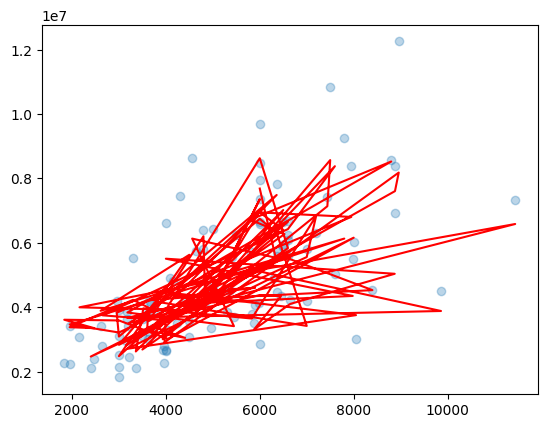

In [ ]:
plt.plot(test_feature['area'], pred_result['Gradient Boosting Regressor_predict'], c='r')
plt.scatter(test_feature['area'], test_label, alpha=0.3)
plt.show()

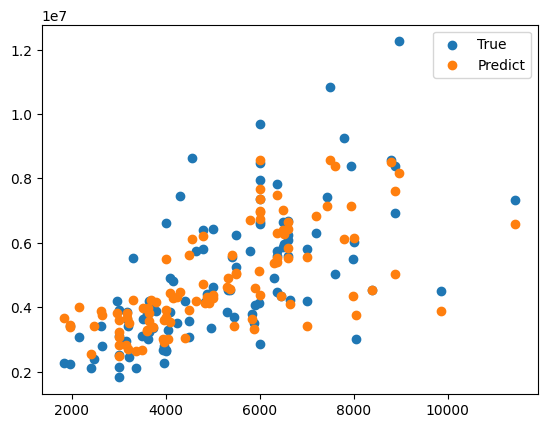

In [ ]:
plt.scatter(test_feature['area'], test_label)
plt.scatter(test_feature['area'], pred_result['Gradient Boosting Regressor_predict'])
plt.legend(['True', 'Predict'])
plt.show()

# 補充:Matplotlib.pyplot

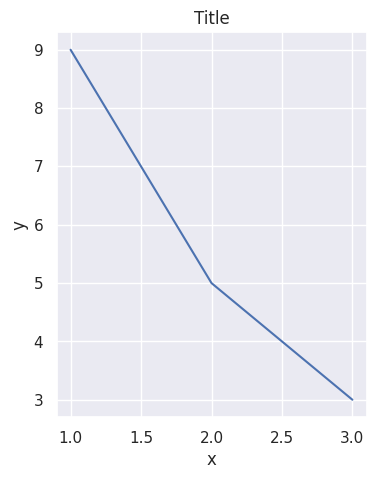

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure, or activate an existing figure
plt.figure(figsize=(4,5))
# Plot y versus x as lines and/or markers 
plt.plot([1,2,3], [9,5,3])  
# Set the title of figure
plt.title('Title')
# Set the label for the x-axis.
plt.xlabel('x')
# Set the label for the y-axis.
plt.ylabel('y')
# Display all open figures
plt.show()

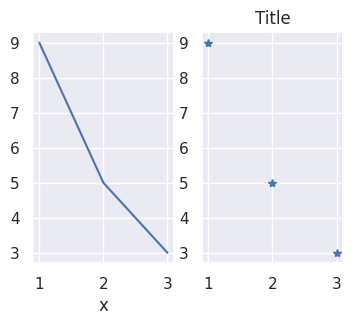

In [ ]:
plt.figure(figsize=(4,3))
plt.subplot(2,1, 1,)
plt.plot([1,2,3], [9,5,3]) 
plt.xlabel('x')
plt.subplot(2,1, 2)
plt.plot([1,2,3], [9,5,3], "*")
plt.title('Title')
plt.show() 

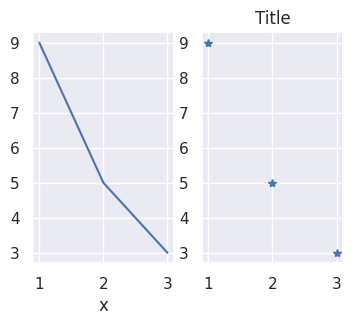

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(4,3))
axes[0].plot([1,2,3], [9,5,3])
axes[0].set_xlabel('x')
axes[1].plot([1,2,3], [9,5,3], "*")
axes[1].set_title('Title')
plt.show() 

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

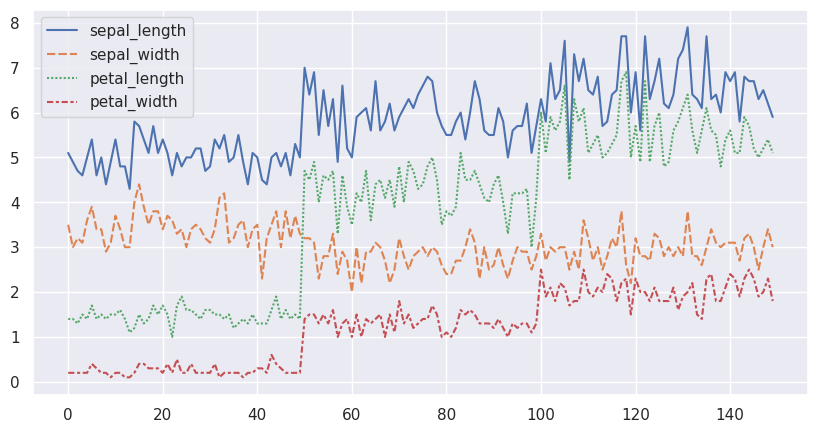

In [ ]:
sns.lineplot(data=iris)
plt.show()